# LAB | NLP Sentiment Analysis


In [1]:
import nltk                              
from nltk.tokenize import word_tokenize  
import pandas as pd                      
import docx2txt                          
from textblob import TextBlob            
import matplotlib.pyplot as plt         
from nltk.stem import WordNetLemmatizer

In [2]:
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [3]:
#filter the data frame to a relevant subset of columns required for our data 
clothing=df[['Title', 'Review Text', 'Rating','Division Name','Department Name']]

In [4]:
clothing.head(2)

,Title,Review Text,Rating,Division Name,Department Name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses


In [5]:
#standardise your column headers
cols=[]
for i in range(len(clothing.columns)):
    cols.append(clothing.columns[i].lower())

In [6]:
clothing.columns=cols

In [7]:
clothing.head(1)

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate


In [53]:
#EDA - with descriptive statistics (eg describe(), shape, info()) and/or simple charts, explore and familiarise yourself with the data at your own pace - clarify 

In [54]:
clothing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            19675 non-null  object 
 1   review text      22641 non-null  object 
 2   rating           22641 non-null  int64  
 3   division name    22628 non-null  object 
 4   department name  22628 non-null  object 
 5   sentiment_score  22641 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [11]:
clothing.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [12]:
clothing.shape

(23486, 5)

In [13]:
clothing['division name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [14]:
# Change Initmates in intimate(typo errors as in Department division is 'intimate')
clothing['division name'].replace("Initmates","Intimate",inplace=True)

C:\Users\wanga\anaconda3\envs\classenv\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [15]:
clothing['division name'].value_counts()

General           13850
General Petite     8120
Intimate           1502
Name: division name, dtype: int64

In [16]:
#use the pandas groupby function to summarise the average rating by division and department as a new dataframe (image clothing_rating_groupby.png)
dep_group_by=clothing.groupby(['division name','department name']).agg({'rating':'mean'})

<AxesSubplot:ylabel='division name,department name'>

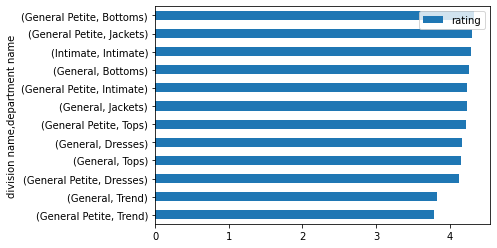

In [17]:
#this dataframe can be easily visualised as a bar chart 
dep_group_by.sort_values(by=['rating']).plot(kind='barh')

In [18]:
#Check the whole values with no conc
#do a spot /sample check on the review column, 
pd.set_option('display.max_colwidth', None)
clothing['review text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Absolutely wonderful - silky and sexy and comfortable
1                                                                                                                                                                                                             Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone w

In [55]:
#index position 5 (hint: iloc/loc/at) to apply textblob over the selected review text 
TextBlob(clothing.iloc[5,1]).sentiment 

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

In [56]:
#Do this for at least 3 samples to evaluate the accuracy of the sentiment polarity and subjectivity against the text itself
TextBlob(clothing.iloc[4,1]).sentiment

Sentiment(polarity=0.512890625, subjectivity=0.56875)

In [57]:
TextBlob(clothing.iloc[-2348,1]).sentiment

Sentiment(polarity=0.17308802308802307, subjectivity=0.41911976911976906)

In [58]:
#for the any selected customer review, use textblob to break out the text into sentences 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [59]:
stop_words=stopwords.words('english')

In [60]:

# define a clean function 
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower()) 
        
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
        
    #joining
    return " ".join(text_cleaned)


In [61]:
TextBlob(clothing['review text'].iloc[5]).sentences

[Sentence("I love tracy reese dresses, but this one is not for the very petite."),
 Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."),
 Sentence("this dress was very pretty out of the package but its a lot of dress."),
 Sentence("the skirt is long and very full so it overwhelmed my small frame."),
 Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."),
 Sentence("i love the color and the idea of the style but it just did not work on me."),
 Sentence("i returned this dress.")]

In [62]:
TextBlob(clothing['review text'].iloc[4]).sentences

[Sentence("This shirt is very flattering to all due to the adjustable front tie."),
 Sentence("it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan."),
 Sentence("love this shirt!!"),
 Sentence("!")]

In [63]:
TextBlob(clothing['review text'].iloc[-2348]).sentences

[Sentence("I love this shirt and although it is see through a tank works great under it to wear to work."),
 Sentence("the buttons on the back are sewn on really well and it comes down far enough/ is not too short."),
 Sentence("i am about 5'4" and 100 pounds."),
 Sentence("the 00 was tight on my neck so i kept a 0. otherwise the 00 would have fit fine since its a blousy shirt and would not have been too tight in the shoulders or armpits.")]

In [64]:
# using dropna, remove any rows in your data which contain have null in the review column ( hint your new data will be 22641 rows)
clothing.dropna(subset=['review text'], inplace=True)

C:\Users\wanga\anaconda3\envs\classenv\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [66]:
clothing.shape

(22641, 6)

In [67]:
#define a function with lambda (or other preferred method) to calculate sentiment polarity for each row of the filtered review data set, as a new column on the data frame. (image clothing_sentiment_allrows.png)
clothing['sentiment_score']=clothing['review text'].apply(lambda x:TextBlob(x).sentiment.polarity)


C:\Users\wanga\AppData\Local\Temp/ipykernel_15084/1116165941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clothing['sentiment_score']=clothing['review text'].apply(lambda x:TextBlob(x).sentiment.polarity)


In [68]:
clothing.head(1)

,title,review text,rating,division name,department name,sentiment_score
0,NaN,Absolutely wonderful - silky and sexy and comfortable,4,Intimate,Intimate,0.633333


In [69]:
clothing.describe()

,rating,sentiment_score
count,22641.000000,22641.000000
mean,4.183561,0.249824
std,1.115762,0.176679
min,1.000000,-0.975000
25%,4.000000,0.140000
50%,5.000000,0.239399
75%,5.000000,0.350000
max,5.000000,1.000000


In [70]:
#using the pandas groupby function again, summarise the minimum review polarity, by division and department as a new dataframe (image clothing_min_review.png) - this means whats the lowest sentiment score seen in each department and division - so everything will be less than 0
group_by_sum=clothing.groupby(['division name','department name']).agg({'sentiment_score':'min'})

In [71]:
group_by_sum.sort_values(by=['sentiment_score'])

sentiment_score
division name  department name                 
General        Tops                   -0.975000
               Dresses                -0.916667
               Jackets                -0.750000
General Petite Tops                   -0.700000
               Intimate               -0.575000
               Jackets                -0.562500
General        Bottoms                -0.533333
General Petite Dresses                -0.400000
Intimate       Intimate               -0.392333
General        Trend                  -0.270833
General Petite Bottoms                -0.257778
               Trend                  -0.083333

<AxesSubplot:ylabel='division name,department name'>

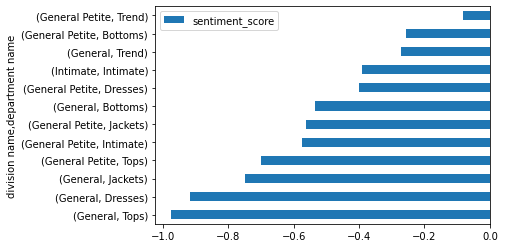

In [72]:
# visualise this summary as a simple sorted bar chart
group_by_sum.sort_values(by=['sentiment_score']).plot(kind='barh')

In [73]:
# using the pandas groupby function again, summarise the average review polarity, by division and department as a new dataframe
group_by_avg=clothing.groupby(['division name','department name']).agg({'sentiment_score':'mean'})

<AxesSubplot:ylabel='division name,department name'>

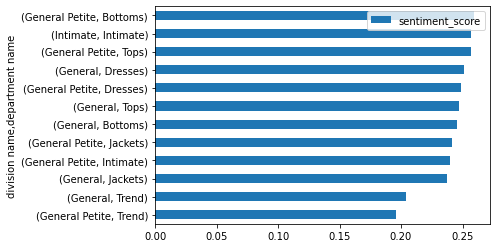

In [74]:
#visualise this summary as a simple sorted bar chart
group_by_avg.sort_values(by=['sentiment_score']).plot(kind='barh')

Thank you:)